In [95]:
import pandas as pd

c_df = pd.read_csv('./datasets/house.csv', low_memory=False)
c_df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


In [96]:
c_df = c_df.drop(labels=['agency','agent','page_url','property_id','location_id','latitude','longitude','date_added','location','Area Category','area'], axis=1)
c_df['price'] = c_df.pop('price')

In [97]:
from sklearn.preprocessing import LabelEncoder

columns = ['property_type', 'city','province_name','purpose','Area Type']
encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(c_df[column])
    c_df[column] = result
    encoders[column] = encoder.classes_

print(encoders)

{'property_type': array(['Farm House', 'Flat', 'House', 'Lower Portion', 'Penthouse',
       'Room', 'Upper Portion'], dtype=object), 'city': array(['Faisalabad', 'Islamabad', 'Karachi', 'Lahore', 'Rawalpindi'],
      dtype=object), 'province_name': array(['Islamabad Capital', 'Punjab', 'Sindh'], dtype=object), 'purpose': array(['For Rent', 'For Sale'], dtype=object), 'Area Type': array(['Kanal', 'Marla'], dtype=object)}


In [98]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

# ptf = PowerTransformer(method='box-cox', standardize=False)
ptf = PowerTransformer(standardize=False)

result = ptf.fit_transform(c_df[['Area Size']])
c_df['Area Size'] = result

result = ptf.fit_transform(c_df[['price']])
c_df['price'] = result

result = ptf.fit_transform(c_df[['bedrooms']])
c_df['bedrooms'] = result

result = ptf.fit_transform(c_df[['baths']])
c_df['baths'] = result


In [99]:
from sklearn.preprocessing import StandardScaler

features = c_df

std = StandardScaler()
std_features = std.fit_transform(features)
std_under_h_df = pd.DataFrame(std_features, columns=features.columns)

for column in std_under_h_df.columns:
    std_under_h_df.drop(
        std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)

for column in std_under_h_df.columns:
    print(f'{column}: {std_under_h_df[~std_under_h_df[column].between(-1.96, 1.96)].shape[0]}건')

c_df = c_df.iloc[std_under_h_df.index].reset_index(drop=True)

property_type: 0건
city: 0건
province_name: 0건
baths: 0건
purpose: 0건
bedrooms: 0건
Area Type: 0건
Area Size: 0건
price: 0건


array([[<Axes: title={'center': 'property_type'}>,
        <Axes: title={'center': 'city'}>,
        <Axes: title={'center': 'province_name'}>],
       [<Axes: title={'center': 'baths'}>,
        <Axes: title={'center': 'purpose'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'Area Type'}>,
        <Axes: title={'center': 'Area Size'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

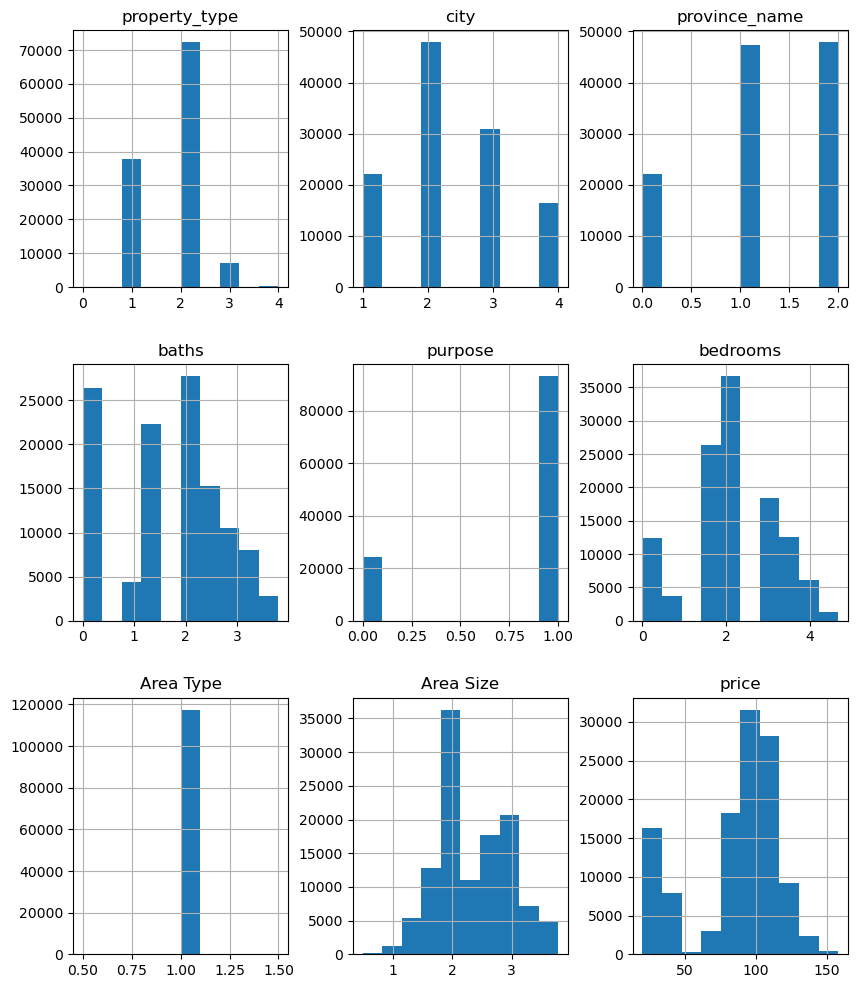

In [100]:
c_df.hist(figsize=(10,12))

In [101]:
c_df.corr()['price'].sort_values(ascending=False)[1:]

purpose          0.898841
bedrooms         0.329965
baths            0.233093
Area Size        0.230863
province_name    0.153067
city             0.095175
property_type   -0.002147
Area Type             NaN
Name: price, dtype: float64

In [102]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))
    # print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
    #   .format(MSE, RMSE,  R2))

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

MSE: 82.8362, RMSE: 9.1014, MSLE: 0.0234, RMSLE: 0.1531, R2: 0.9121


In [104]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.727e+05
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        22:40:31   Log-Likelihood:            -4.2586e+05
No. Observations:              117405   AIC:                         8.517e+05
Df Residuals:                  117397   BIC:                         8.518e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
property_type     1.0145      0.051     19.755

In [105]:
c_df = c_df.drop(labels=['baths'], axis=1)

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

MSE: 82.8396, RMSE: 9.1016, MSLE: 0.0234, RMSLE: 0.1531, R2: 0.9121


In [107]:
from statsmodels.api import OLS

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.015e+05
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        22:41:08   Log-Likelihood:            -4.2586e+05
No. Observations:              117405   AIC:                         8.517e+05
Df Residuals:                  117398   BIC:                         8.518e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
property_type     1.0134      0.051     19.735

In [119]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [120]:
prediction = l_r.predict(X_test)
get_evaluation(y_test.values, prediction)

MSE: 55.6411, RMSE: 7.4593, MSLE: 0.0071, RMSLE: 0.0841, R2: 0.9410


In [121]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 47.4948, RMSE: 6.8916, MSLE: 0.0059, RMSLE: 0.0770, R2: 0.9496
RandomForestRegressor
MSE: 46.2199, RMSE: 6.7985, MSLE: 0.0057, RMSLE: 0.0758, R2: 0.9510
GradientBoostingRegressor
MSE: 54.1753, RMSE: 7.3604, MSLE: 0.0069, RMSLE: 0.0829, R2: 0.9425
XGBRegressor
MSE: 45.7449, RMSE: 6.7635, MSLE: 0.0057, RMSLE: 0.0754, R2: 0.9515
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 93924, number of used features: 6
[LightGBM] [Info] Start training from score 86.736684
LGBMRegressor
MSE: 46.3627, RMSE: 6.8090, MSLE: 0.0059, RMSLE: 0.0767, R2: 0.9508


In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

rf_r = RandomForestRegressor(random_state=124)

parameters = {'max_depth': [4, 8, 12, 20], 'min_samples_split': [20, 30, 40, 50, 60], 'n_estimators': [10, 50, 100, 500, 1000]}
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

# grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='neg_mean_squared_error', cv=kfold)
grid_rf_r = GridSearchCV(rf_r, param_grid=parameters, scoring='r2', cv=kfold)
grid_rf_r.fit(X_train, y_train)


KeyboardInterrupt



In [ ]:
result_df = pd.DataFrame(grid_rf_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)